<a href="https://colab.research.google.com/github/PabloFalc/ia/blob/main/SSSPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn kagglehub

✅ Dataset carregado! Linhas: 297, Colunas: 14
✅ Dados limpos e colunas renomeadas.
✅ Análise concluída. Temos dados agrupados de 29 a 77 anos.


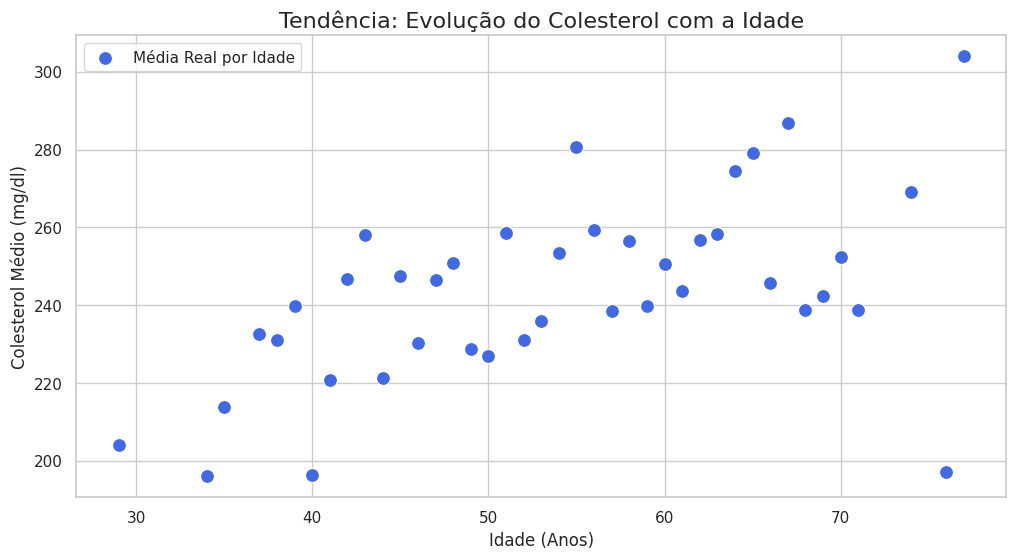


🤖 RESULTADO DA MODELAGEM PREDITIVA:
Contexto: Tentando prever o Colesterol baseando-se apenas na Idade.
R² (Explicação do Modelo): 0.2986
(Nota: Em dados biológicos reais, o R² costuma ser baixo pois há muitos outros fatores além da idade.)

🔮 Previsão para idades avançadas:
 - Aos 78 anos, espera-se colesterol médio de: 268.20
 - Aos 79 anos, espera-se colesterol médio de: 269.23
 - Aos 80 anos, espera-se colesterol médio de: 270.26
 - Aos 81 anos, espera-se colesterol médio de: 271.29
 - Aos 82 anos, espera-se colesterol médio de: 272.33


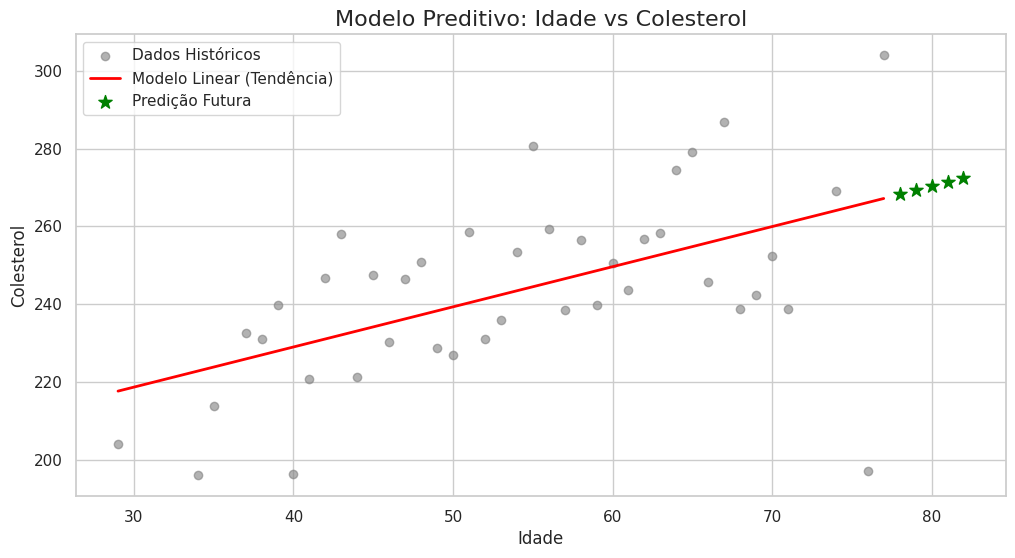

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import warnings

# Configurações Visuais
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="muted")

class AnaliseTemplate:
    def __init__(self, caminho_arquivo):
        self.caminho_arquivo = caminho_arquivo
        self.df = None
        self.modelo = None
        self.dados_agrupados = None

    def carregar_dados(self):
        """Carrega o CSV."""
        try:
            self.df = pd.read_csv(self.caminho_arquivo)
            print(f"✅ Dataset carregado! Linhas: {self.df.shape[0]}, Colunas: {self.df.shape[1]}")
            return self.df
        except FileNotFoundError:
            print(f"❌ Erro: O arquivo '{self.caminho_arquivo}' não foi encontrado.")
            return None

    def limpar_dados(self):
        """
        Adaptação para Heart Disease:
        - Remove duplicatas
        - Não vamos tratar datas aqui (pois não temos coluna de data)
        - Renomeia colunas para ficar mais legível nos gráficos
        """
        if self.df is None: return

        # 1. Remover duplicatas
        self.df.drop_duplicates(inplace=True)

        # 2. Mapa de renomeação (Clean Code: Nomes explícitos são melhores que siglas)
        # Isso ajuda muito na hora da apresentação
        mapa_colunas = {
            'age': 'Idade',
            'sex': 'Sexo',
            'chol': 'Colesterol',
            'trestbps': 'Pressao_Arterial',
            'condition': 'Doenca_Cardiaca'
        }
        self.df.rename(columns=mapa_colunas, inplace=True)

        # 3. Tratamento simples de nulos (se houver)
        self.df.fillna(0, inplace=True)

        print("✅ Dados limpos e colunas renomeadas.")
        return self.df

    def analisar_tendencia(self):
        """
        Simulação: Em vez de agrupar por ANO, vamos agrupar por IDADE.
        Queremos ver: 'Qual a média de Colesterol para cada idade?'
        """
        # Agrupa por Idade e calcula a média das outras colunas numéricas
        # reset_index() transforma o índice 'Idade' de volta em uma coluna normal
        self.dados_agrupados = self.df.groupby('Idade')[['Colesterol', 'Pressao_Arterial']].mean().reset_index()

        print(f"✅ Análise concluída. Temos dados agrupados de {self.dados_agrupados['Idade'].min()} a {self.dados_agrupados['Idade'].max()} anos.")
        return self.dados_agrupados

    def visualizar_dados(self):
        """Gera gráfico de dispersão com linha de tendência."""
        if self.dados_agrupados is None: return

        plt.figure(figsize=(12, 6))

        # Plota os pontos reais (Média de colesterol por idade)
        sns.scatterplot(
            data=self.dados_agrupados,
            x='Idade',
            y='Colesterol',
            s=100,
            color='royalblue',
            label='Média Real por Idade'
        )

        plt.title('Tendência: Evolução do Colesterol com a Idade', fontsize=16)
        plt.ylabel('Colesterol Médio (mg/dl)')
        plt.xlabel('Idade (Anos)')
        plt.legend()
        plt.show()

    def predicao_futura(self, anos_futuros=10):
        """
        Tenta prever o colesterol para idades que não temos ou projetar o futuro.
        X = Idade
        y = Colesterol
        """
        # Preparação (Reshape é obrigatório para o sklearn quando temos apenas 1 feature)
        X = self.dados_agrupados['Idade'].values.reshape(-1, 1)
        y = self.dados_agrupados['Colesterol'].values

        # Treino
        self.modelo = LinearRegression()
        self.modelo.fit(X, y)

        # Predição: Vamos prever para pessoas mais velhas (ex: até 90 anos)
        idade_maxima = self.dados_agrupados['Idade'].max()
        idades_futuras = np.array([[idade_maxima + i] for i in range(1, anos_futuros + 1)])
        previsoes = self.modelo.predict(idades_futuras)

        # Métricas
        score = r2_score(y, self.modelo.predict(X))

        print("\n🤖 RESULTADO DA MODELAGEM PREDITIVA:")
        print(f"Contexto: Tentando prever o Colesterol baseando-se apenas na Idade.")
        print(f"R² (Explicação do Modelo): {score:.4f}")
        print("(Nota: Em dados biológicos reais, o R² costuma ser baixo pois há muitos outros fatores além da idade.)")

        print("\n🔮 Previsão para idades avançadas:")
        for i, idade in enumerate(idades_futuras):
            print(f" - Aos {idade[0]} anos, espera-se colesterol médio de: {previsoes[i]:.2f}")

        # Visualização da Regressão
        plt.figure(figsize=(12, 6))

        # Dados Reais
        plt.scatter(X, y, color='gray', alpha=0.6, label='Dados Históricos')

        # Linha do Modelo (Regressão)
        linha_tendencia = self.modelo.predict(X)
        plt.plot(X, linha_tendencia, color='red', linewidth=2, label='Modelo Linear (Tendência)')

        # Pontos Futuros
        plt.scatter(idades_futuras, previsoes, color='green', s=100, marker='*', label='Predição Futura')

        plt.title('Modelo Preditivo: Idade vs Colesterol', fontsize=16)
        plt.xlabel('Idade')
        plt.ylabel('Colesterol')
        plt.legend()
        plt.show()

# --- BLOCO DE EXECUÇÃO ---
if __name__ == "__main__":
    # 1. Mude aqui para o nome exato do arquivo que você baixou
    arquivo_csv = 'heart_cleveland_upload.csv'

    # Instancia a classe
    app = AnaliseTemplate(arquivo_csv)

    # Executa o fluxo
    if app.carregar_dados() is not None:
        app.limpar_dados()
        app.analisar_tendencia()
        app.visualizar_dados()
        app.predicao_futura(anos_futuros=5) # Prevê 5 anos além da idade máxima do dataset

# Análise: Doenças Cardíacas (Heart Disease)

In [ ]:
# CÉLULA 1: IMPORTS E CONFIGURAÇÃO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats # Para moda e cálculos estatísticos avançados
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings
import kagglehub

# Configurações de Estética (Para os gráficos ficarem profissionais)
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="viridis") # Palette viridis é ótima para apresentações sérias
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Ambiente configurado com sucesso.")

✅ Ambiente configurado com sucesso.


In [ ]:
# CÉLULA 2: CARREGAMENTO E INSPEÇÃO DE QUALIDADE
arquivo_csv = kagglehub.dataset_download("psicodata/dados-de-suicidios-entre-2010-e-2019")

try:
    df = pd.read_csv(arquivo_csv)

    # 1. Limpeza Básica (Renomear para Português para a apresentação)
    # Se for o Dataset da SSP, ajuste os nomes aqui
    mapa_colunas = {
        'age': 'Idade', 'sex': 'Sexo', 'cp': 'Tipo_Dor_Peito',
        'trestbps': 'Pressao_Arterial', 'chol': 'Colesterol',
        'fbs': 'Acucar_Sangue', 'thalach': 'Freq_Cardiaca_Max',
        'target': 'Doenca', 'condition': 'Doenca'
    }
    df.rename(columns=mapa_colunas, inplace=True)

    # 2. Visão Geral
    print(f"--- ESTRUTURA DO DATASET ---")
    print(f"Linhas: {df.shape[0]} | Colunas: {df.shape[1]}")
    print("\n--- TIPOS DE DADOS ---")
    print(df.dtypes)

    # 3. Checagem de Nulos (Campos não informados)
    print("\n--- DADOS FALTANTES (MISSING VALUES) ---")
    nulos = df.isnull().sum()
    if nulos.sum() == 0:
        print("✅ Dataset perfeito! Nenhum valor nulo encontrado.")
    else:
        print(nulos[nulos > 0])
        # Tratamento rápido para nulos (preencher com a média ou zero)
        df.fillna(df.mean(numeric_only=True), inplace=True)
        print("⚠️ Valores nulos tratados automaticamente.")

    # Mostra as primeiras 5 linhas
    display(df.head())

except FileNotFoundError:
    print("❌ Arquivo não encontrado. Faça o upload na aba lateral.")

--- ESTRUTURA DO DATASET ---
Linhas: 297 | Colunas: 14

--- TIPOS DE DADOS ---
Idade                  int64
Sexo                   int64
Tipo_Dor_Peito         int64
Pressao_Arterial       int64
Colesterol             int64
Acucar_Sangue          int64
restecg                int64
Freq_Cardiaca_Max      int64
exang                  int64
oldpeak              float64
slope                  int64
ca                     int64
thal                   int64
Doenca                 int64
dtype: object

--- DADOS FALTANTES (MISSING VALUES) ---
✅ Dataset perfeito! Nenhum valor nulo encontrado.


,Idade,Sexo,Tipo_Dor_Peito,Pressao_Arterial,Colesterol,Acucar_Sangue,restecg,Freq_Cardiaca_Max,exang,oldpeak,slope,ca,thal,Doenca
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# CÉLULA 3: ESTATÍSTICA DESCRITIVA (A MATEMÁTICA)

def relatorio_estatistico(dataframe, coluna):
    """Gera um card com todas as métricas estatísticas de uma coluna."""
    dados = dataframe[coluna]

    media = dados.mean()
    mediana = dados.median()
    moda = dados.mode()[0] # Pode haver mais de uma moda, pegamos a primeira
    variancia = dados.var()
    desvio = dados.std()
    minimo = dados.min()
    maximo = dados.max()

    print(f"📊 ANÁLISE ESTATÍSTICA: {coluna.upper()}")
    print(f"-"*40)
    print(f"Média (Tendência Central): {media:.2f}")
    print(f"Mediana (Valor do Meio):   {mediana:.2f}")
    print(f"Moda (Mais Frequente):     {moda:.2f}")
    print(f"-"*40)
    print(f"Variância (Dispersão):     {variancia:.2f}")
    print(f"Desvio Padrão (Risco):     {desvio:.2f}")
    print(f"Amplitude:                 {minimo} até {maximo}")
    print(f"\n")

# --- EXECUÇÃO ---
# Escolha as colunas numéricas mais importantes para analisar
# No caso da SSP, seriam 'Numero_Suicidios', 'Taxa_Desemprego', etc.
colunas_analise = ['Idade', 'Colesterol', 'Pressao_Arterial']

for col in colunas_analise:
    relatorio_estatistico(df, col)

# Visão Geral de tudo (Método pronto do Pandas)
print("--- RESUMO GERAL DO PANDAS ---")
display(df.describe())

📊 ANÁLISE ESTATÍSTICA: IDADE
----------------------------------------
Média (Tendência Central): 54.54
Mediana (Valor do Meio):   56.00
Moda (Mais Frequente):     58.00
----------------------------------------
Variância (Dispersão):     81.90
Desvio Padrão (Risco):     9.05
Amplitude:                 29 até 77


📊 ANÁLISE ESTATÍSTICA: COLESTEROL
----------------------------------------
Média (Tendência Central): 247.35
Mediana (Valor do Meio):   243.00
Moda (Mais Frequente):     197.00
----------------------------------------
Variância (Dispersão):     2703.75
Desvio Padrão (Risco):     52.00
Amplitude:                 126 até 564


📊 ANÁLISE ESTATÍSTICA: PRESSAO_ARTERIAL
----------------------------------------
Média (Tendência Central): 131.69
Mediana (Valor do Meio):   130.00
Moda (Mais Frequente):     120.00
----------------------------------------
Variância (Dispersão):     315.52
Desvio Padrão (Risco):     17.76
Amplitude:                 94 até 200


--- RESUMO GERAL DO PANDAS -

,Idade,Sexo,Tipo_Dor_Peito,Pressao_Arterial,Colesterol,Acucar_Sangue,restecg,Freq_Cardiaca_Max,exang,oldpeak,slope,ca,thal,Doenca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000



 Histogramas


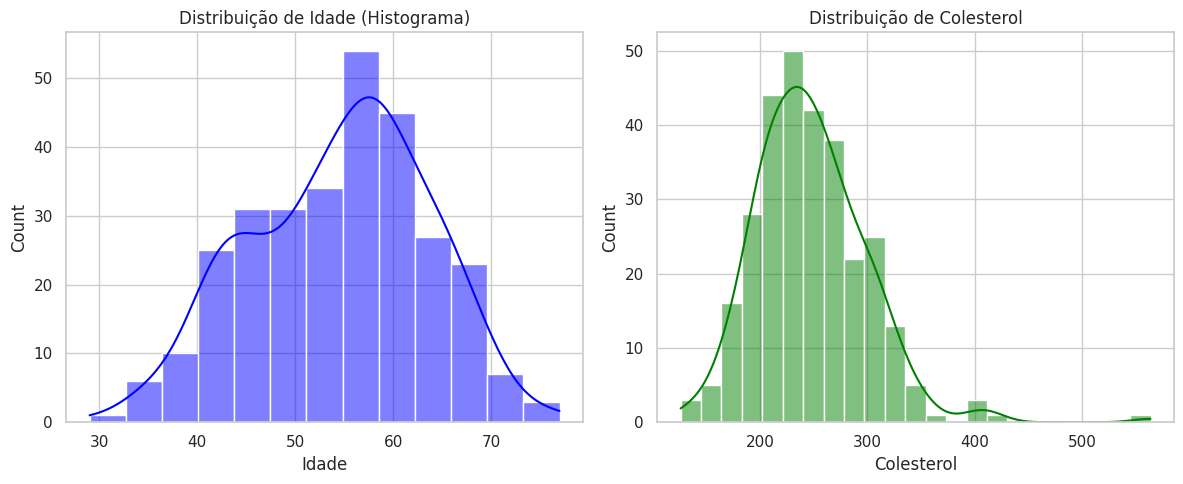


 Boxplot


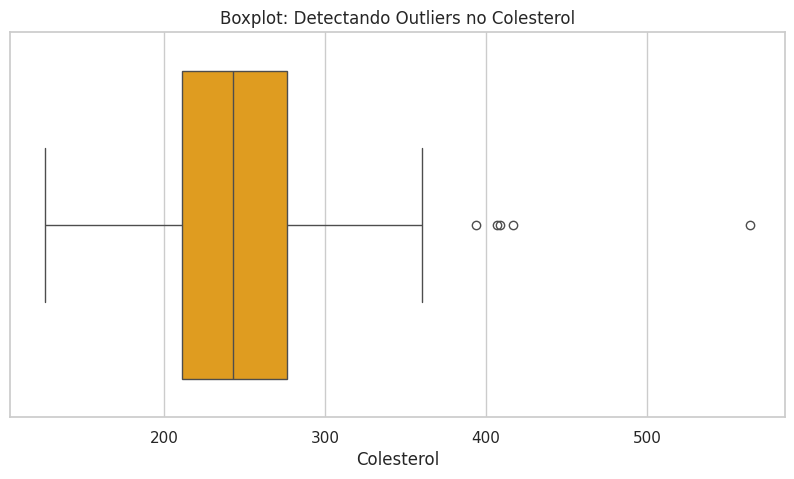


 Mapa de Calor de Correlação (Heatmap)


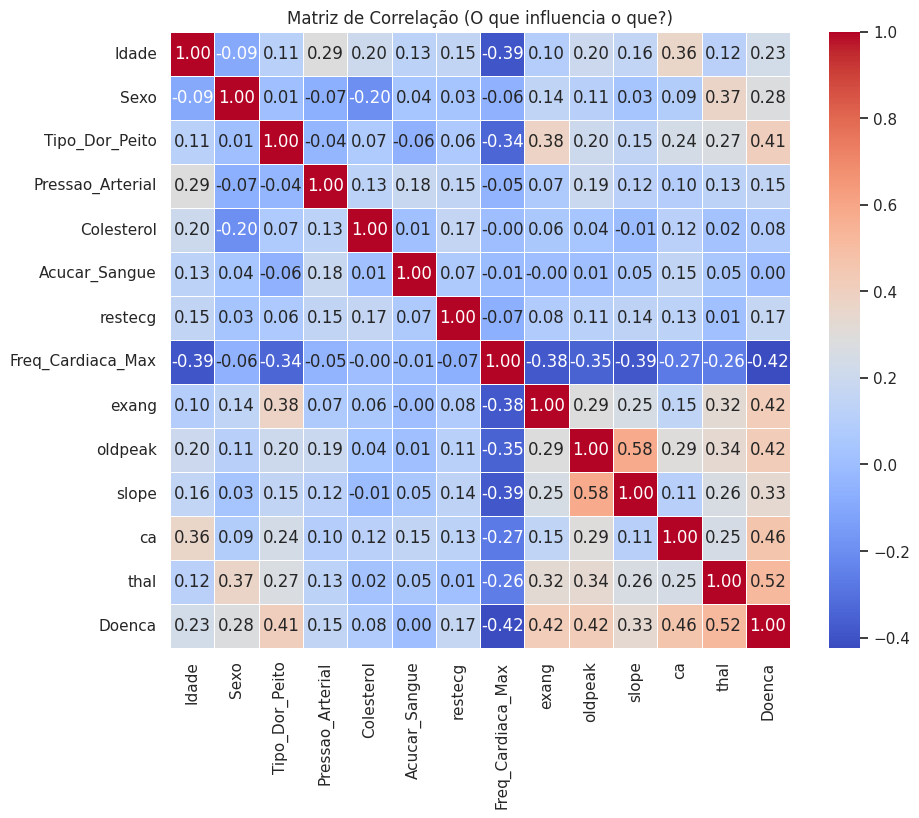

In [ ]:
# CÉLULA 4: VISUALIZAÇÃO DE DADOS (EDA)

# 1. Histograma (Distribuição dos Dados)
print("\n Histogramas")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Idade'], kde=True, color='blue')
plt.title('Distribuição de Idade (Histograma)')

plt.subplot(1, 2, 2)
sns.histplot(df['Colesterol'], kde=True, color='green')
plt.title('Distribuição de Colesterol')
plt.tight_layout()
plt.show()

# 2. Boxplot (Detecção de Outliers)
# Explicação: Pontos fora dos "bigodes" são anomalias (valores muito altos ou baixos)
print("\n Boxplot")
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Colesterol'], color='orange')
plt.title('Boxplot: Detectando Outliers no Colesterol')
plt.show()

# 3. Mapa de Calor de Correlação (Heatmap)
print("\n Mapa de Calor de Correlação (Heatmap)")
# Explicação: Cores quentes (perto de 1) indicam que quando um sobe, o outro sobe.
# Cores frias (perto de -1) indicam relação inversa.
plt.figure(figsize=(10, 8))
# Filtra apenas colunas numéricas para a correlação
cols_numericas = df.select_dtypes(include=[np.number])
correlacao = cols_numericas.corr()

sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação (O que influencia o que?)')
plt.show()

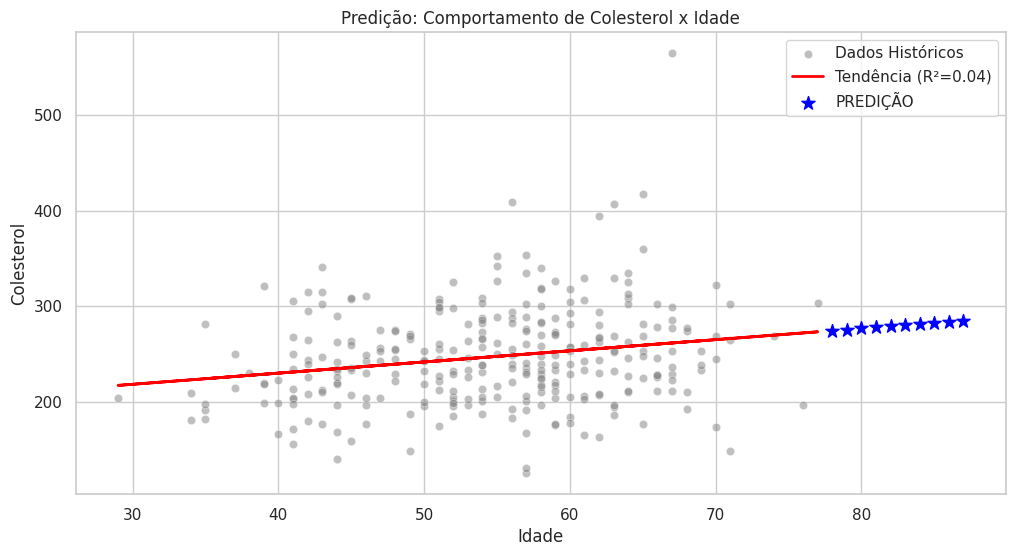

🔮 PREVISÃO PARA OS PRÓXIMOS 10 PASSOS:
 -> Idade 78: Previsão de 274.66
 -> Idade 79: Previsão de 275.83
 -> Idade 80: Previsão de 276.99
 -> Idade 81: Previsão de 278.16
 -> Idade 82: Previsão de 279.32
 -> Idade 83: Previsão de 280.48
 -> Idade 84: Previsão de 281.65
 -> Idade 85: Previsão de 282.81
 -> Idade 86: Previsão de 283.98
 -> Idade 87: Previsão de 285.14


In [ ]:
# CÉLULA 5: ANÁLISE PREDITIVA E CONCLUSÃO

def prever_futuro(dataframe, x_col, y_col, anos_futuro=5):
    # Prepara os dados
    X = dataframe[x_col].values.reshape(-1, 1) # Variável independente (Tempo/Idade)
    y = dataframe[y_col].values # Variável dependente (Alvo)

    # Cria e treina o modelo
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Cria dados futuros para prever
    max_x = dataframe[x_col].max()
    futuro_x = np.array([[max_x + i] for i in range(1, anos_futuro + 1)])
    previsao_y = modelo.predict(futuro_x)

    # Métricas de erro
    score_r2 = r2_score(y, modelo.predict(X))

    # Plotagem
    plt.figure(figsize=(12, 6))

    # Dados Passados
    sns.scatterplot(x=dataframe[x_col], y=dataframe[y_col], color='gray', label='Dados Históricos', alpha=0.5)

    # Linha de Tendência
    plt.plot(X, modelo.predict(X), color='red', linewidth=2, label=f'Tendência (R²={score_r2:.2f})')

    # Futuro
    plt.scatter(futuro_x, previsao_y, color='blue', s=100, marker='*', label='PREDIÇÃO')

    plt.title(f'Predição: Comportamento de {y_col} x {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend()
    plt.show()

    print(f"🔮 PREVISÃO PARA OS PRÓXIMOS {anos_futuro} PASSOS:")
    for i, val in enumerate(futuro_x):
        print(f" -> {x_col} {val[0]}: Previsão de {previsao_y[i]:.2f}")

# --- EXECUÇÃO ---
# Para o teste do Coração: Idade prevendo Colesterol
prever_futuro(df, 'Idade', 'Colesterol', anos_futuro=10)

# OBSERVAÇÃO PARA A SSP:
# Lá você mudará para: prever_futuro(df, 'Ano', 'Numero_Obitos', anos_futuro=2)

# Análise: Suicídios de 2010 a 2019

In [ ]:
# CÉLULA 1: IMPORTS E CONFIGURAÇÃO GERAL
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Ajustes visuais para gráficos de alto impacto
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

print("✅ Ambiente de Data Science configurado.")

✅ Ambiente de Data Science configurado.


In [ ]:
# CÉLULA 2: CARREGAMENTO E ENGENHARIA DE DADOS
arquivo_csv = 'suicidios_2010_a_2019.csv'

try:
    # Tenta carregar (encoding padrão ou latin1 comum no governo)
    try:
        df = pd.read_csv(arquivo_csv, encoding='utf-8', on_bad_lines='skip')
    except UnicodeDecodeError:
        df = pd.read_csv(arquivo_csv, encoding='latin1', on_bad_lines='skip')

    # 1. Limpeza e Padronização
    # Convertendo colunas de data para formato datetime real
    df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], errors='coerce')
    df['DTNASC'] = pd.to_datetime(df['DTNASC'], errors='coerce')

    # 2. Feature Engineering (Criando dados novos a partir dos existentes)
    # Calculando a Idade Exata: (Data Óbito - Data Nasc) / 365.25 dias
    df['Idade_Calculada'] = (df['DTOBITO'] - df['DTNASC']).dt.days / 365.25

    # Tratando idades: Preenchendo nulos com 0 e removendo erros (< 0 ou > 120 anos)
    df['Idade_Calculada'] = df['Idade_Calculada'].fillna(0).astype(int)
    df = df[(df['Idade_Calculada'] >= 0) & (df['Idade_Calculada'] < 120)]

    # Mapeando nomes de colunas para ficar bonito na apresentação
    mapa_visual = {
        'ano': 'Ano',
        'mes': 'Mês',
        'estado': 'UF',
        'SEXO': 'Gênero',
        'RACACOR': 'Raça',
        'ESTCIV': 'Estado Civil',
        'Idade_Calculada': 'Idade'
    }
    df.rename(columns=mapa_visual, inplace=True)

    print(f"✅ Dataset Processado! Análise baseada em {df.shape[0]} registros oficiais.")
    print(f"Período: {df['Ano'].min()} a {df['Ano'].max()}")

    # Mostra uma amostra
    display(df.head())

except FileNotFoundError:
    print("❌ Erro: Arquivo csv não encontrado. Faça o upload.")

✅ Dataset Processado! Análise baseada em 112289 registros oficiais.
Período: 2010 a 2019


,Unnamed: 0,UF,Ano,Mês,DTOBITO,DTNASC,Gênero,Raça,ASSISTMED,ESCMAE,Estado Civil,ESC,OCUP,CODMUNRES,CAUSABAS,CAUSABAS_O,LOCOCOR,CIRURGIA,Idade
0,1,AC,2010,1,2010-01-31,1999-11-09,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Via pública,Não,10
1,2,AC,2010,2,2010-02-07,1985-09-23,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,24
2,3,AC,2010,2,2010-02-19,1995-08-06,Masculino,Parda,NaN,NaN,Solteiro/a,1 a 3 anos,ESTUDANTE,Tarauacá,X780,X780,Hospital,Não,14
3,4,AC,2010,4,2010-04-20,1983-12-25,Feminino,Parda,NaN,NaN,Casado/a,1 a 3 anos,DONA DE CASA,Tarauacá,X780,X780,Domicílio,Não,26
4,5,AC,2010,7,2010-07-24,1982-05-13,Masculino,Parda,NaN,NaN,Casado/a,NaN,DONA DE CASA,Tarauacá,X720,X720,Domicílio,Não,28


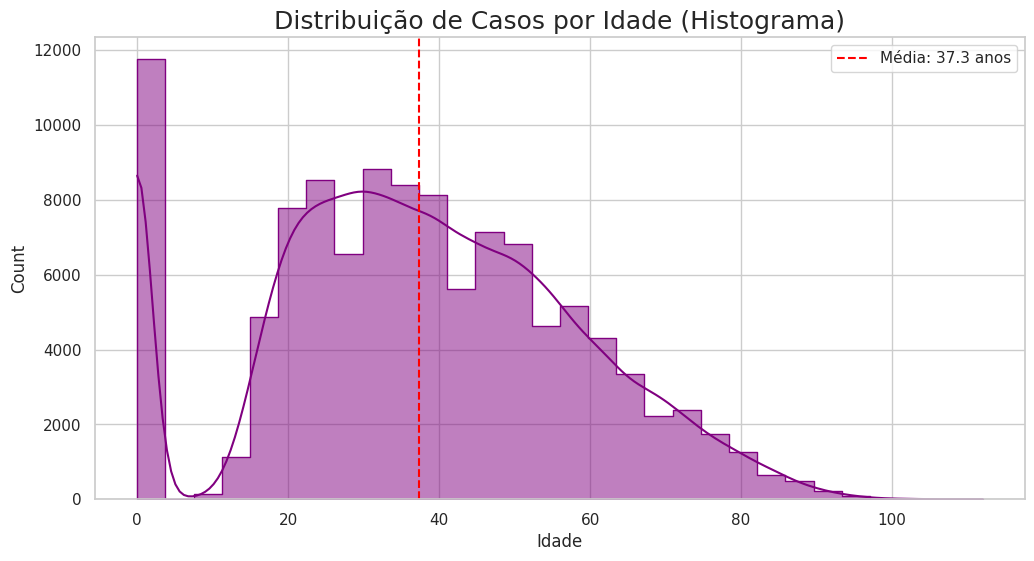

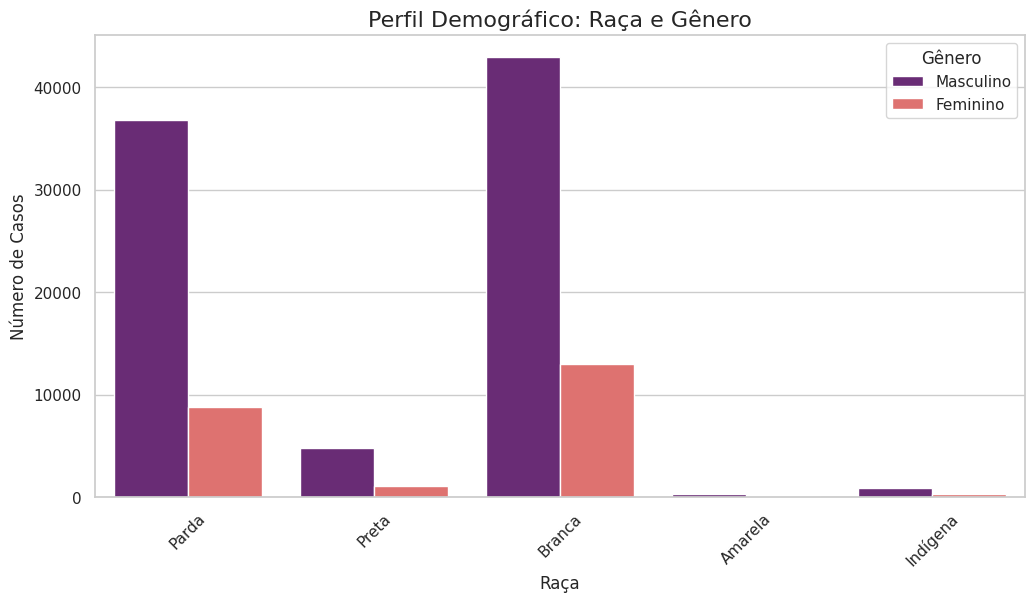

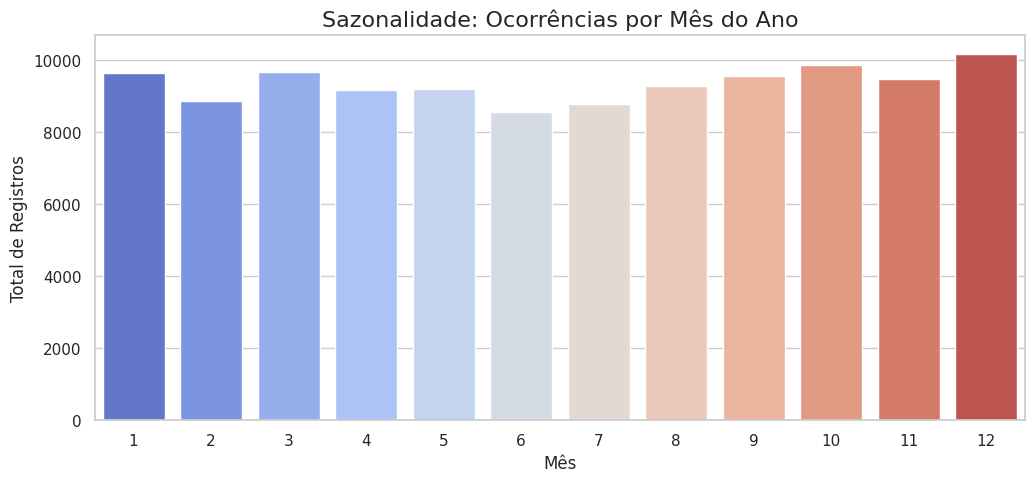

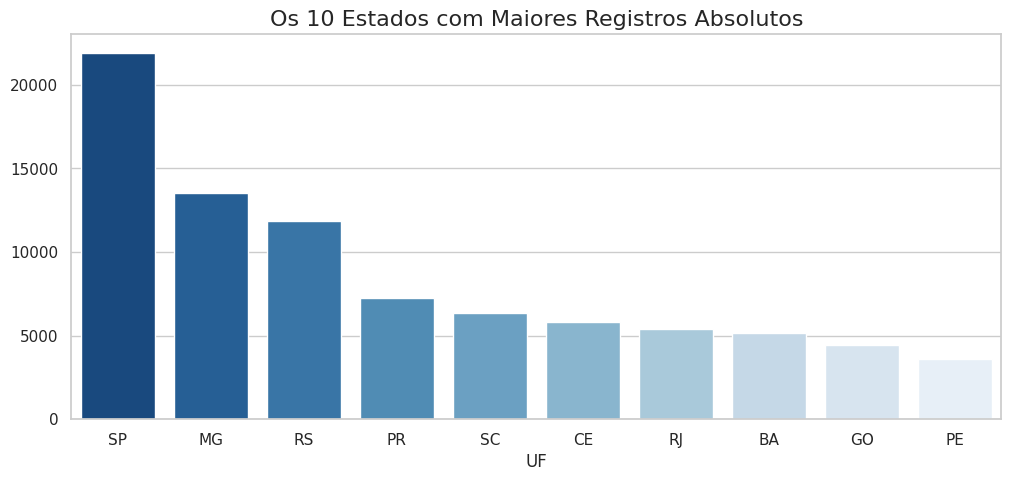

In [ ]:
# CÉLULA 3: ANÁLISE DEMOGRÁFICA E SAZONAL (EDA AVANÇADA)

# 1. Distribuição por Idade (Quem é mais afetado?)
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Idade', bins=30, kde=True, color='purple', element="step")
plt.title('Distribuição de Casos por Idade (Histograma)', fontsize=18)
plt.axvline(df['Idade'].mean(), color='red', linestyle='--', label=f'Média: {df["Idade"].mean():.1f} anos')
plt.legend()
plt.show()

# 2. Cruzamento: Gênero vs Raça (Quem são essas pessoas?)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Raça', hue='Gênero', palette='magma')
plt.title('Perfil Demográfico: Raça e Gênero', fontsize=16)
plt.ylabel('Número de Casos')
plt.xticks(rotation=45)
plt.legend(title='Gênero')
plt.show()

# 3. Sazonalidade (Existe um mês mais crítico?)
# Agrupa por mês e conta os casos
casos_por_mes = df.groupby('Mês').size().reset_index(name='Ocorrências')
plt.figure(figsize=(12, 5))
sns.barplot(data=casos_por_mes, x='Mês', y='Ocorrências', palette='coolwarm')
plt.title('Sazonalidade: Ocorrências por Mês do Ano', fontsize=16)
plt.ylabel('Total de Registros')
plt.show()

# 4. Top 10 Estados com mais registros (Números Absolutos)
top_estados = df['UF'].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_estados.index, y=top_estados.values, palette='Blues_r')
plt.title('Os 10 Estados com Maiores Registros Absolutos', fontsize=16)
plt.show()

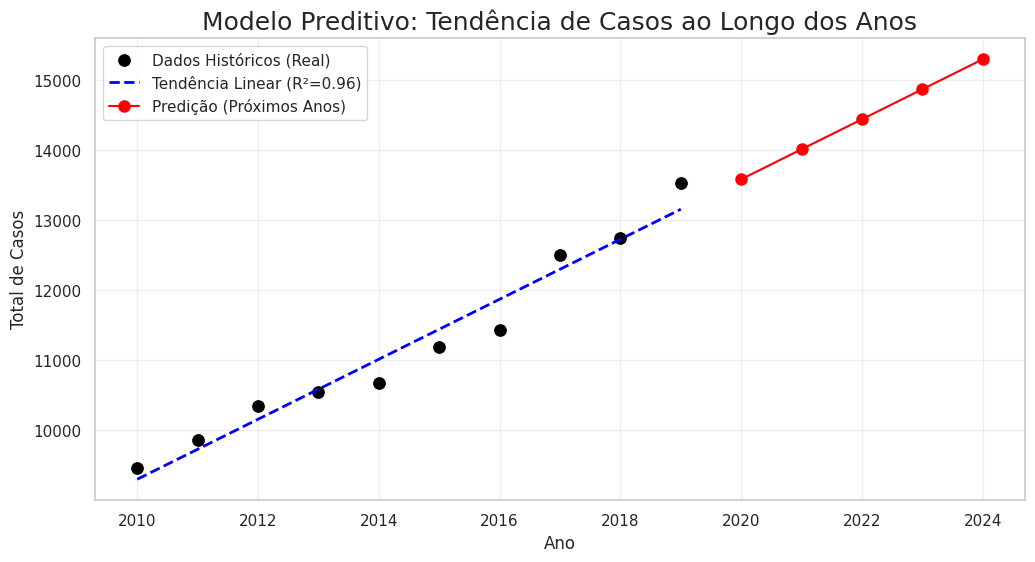

🧠 RESULTADOS DA IA:
A tendência mostra um comportamento CRESCENTE.
Taxa de variação estimada: 428 casos por ano.

🔮 PREVISÕES:
 -> Ano 2020: Estimativa de 13584 casos.
 -> Ano 2021: Estimativa de 14012 casos.
 -> Ano 2022: Estimativa de 14440 casos.
 -> Ano 2023: Estimativa de 14869 casos.
 -> Ano 2024: Estimativa de 15297 casos.


In [ ]:
# CÉLULA 4: MODELAGEM PREDITIVA (REGRESSÃO LINEAR EM SÉRIE TEMPORAL)

def prever_tendencia_suicidio(dataframe, anos_futuro=5):
    # 1. PREPARAÇÃO DOS DADOS (Agrupamento)
    # Transformamos dados individuais em Série Temporal (Ano -> Total Casos)
    dados_anuais = dataframe.groupby('Ano').size().reset_index(name='Total_Casos')

    X = dados_anuais['Ano'].values.reshape(-1, 1)
    y = dados_anuais['Total_Casos'].values

    # 2. TREINAMENTO DO MODELO
    modelo = LinearRegression()
    modelo.fit(X, y)

    # 3. PREDIÇÃO
    ultimo_ano = dados_anuais['Ano'].max()
    anos_x = np.array([[ultimo_ano + i] for i in range(1, anos_futuro + 1)])
    previsao_y = modelo.predict(anos_x)

    # Cálculo do R² (Qualidade do modelo)
    r2 = r2_score(y, modelo.predict(X))

    # 4. VISUALIZAÇÃO
    plt.figure(figsize=(12, 6))

    # Dados Históricos (Pontos Reais)
    sns.scatterplot(x=dados_anuais['Ano'], y=dados_anuais['Total_Casos'], s=100, color='black', label='Dados Históricos (Real)')

    # Linha de Tendência (Passado)
    plt.plot(dados_anuais['Ano'], modelo.predict(X), color='blue', linestyle='--', linewidth=2, label=f'Tendência Linear (R²={r2:.2f})')

    # Previsão Futura
    plt.plot(anos_x, previsao_y, color='red', marker='o', markersize=8, label='Predição (Próximos Anos)')

    # Estética
    plt.title('Modelo Preditivo: Tendência de Casos ao Longo dos Anos', fontsize=18)
    plt.xlabel('Ano')
    plt.ylabel('Total de Casos')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    print(f"🧠 RESULTADOS DA IA:")
    print(f"A tendência mostra um comportamento {'CRESCENTE' if modelo.coef_[0] > 0 else 'DECRESCENTE'}.")
    print(f"Taxa de variação estimada: {int(modelo.coef_[0])} casos por ano.")
    print("\n🔮 PREVISÕES:")
    for i, ano in enumerate(anos_x):
        print(f" -> Ano {ano[0]}: Estimativa de {int(previsao_y[i])} casos.")

# --- EXECUÇÃO ---
prever_tendencia_suicidio(df, anos_futuro=5)

# Apresentação Teste SSP

# 1. Preparação do Ambiente e Configuração Inicial

Nesta etapa, importamos as bibliotecas essenciais para análise de dados e configuramos o estilo visual dos gráficos.
* **Pandas e Numpy:** Manipulação algébrica e tabular dos dados.
* **Seaborn e Matplotlib:** Visualização de dados de alto nível.
* **Scikit-Learn:** Biblioteca de Machine Learning para a modelagem preditiva.
* **Scipy:** Cálculos estatísticos avançados (Moda, Variância).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import warnings

# Configurações Visuais para Apresentação Profissional
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid", context="talk", palette="viridis")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 14

print("✅ Ambiente configurado. Pronto para iniciar a análise.")

✅ Ambiente configurado. Pronto para iniciar a análise.


# 2. Carregamento e Inspeção Profunda dos Dados (Data Quality)

Antes de qualquer análise, precisamos entender a **saúde** e a **estrutura** dos dados recebidos.
Nesta etapa, realizamos:
1.  **Carregamento:** Leitura do arquivo bruto.
2.  **Engenharia de Atributos:** Criação da idade exata baseada nas datas de nascimento e óbito.
3.  **Dicionário de Dados Automático:** Análise de cada coluna, identificando tipos de dados (numéricos ou categóricos) e exemplos de valores.
4.  **Auditoria de Qualidade:** Verificação de volume de dados e campos nulos (missing values) que podem enviesar a análise.

In [ ]:
arquivo_csv = 'suicidios_2010_a_2019.csv'

try:
    # Tenta diferentes encodings para evitar erros de leitura
    try:
        df = pd.read_csv(arquivo_csv, encoding='utf-8', on_bad_lines='skip')
    except UnicodeDecodeError:
        df = pd.read_csv(arquivo_csv, encoding='latin1', on_bad_lines='skip')

    # --- LIMPEZA E ENGENHARIA DE DADOS ---
    # Padronização de Datas
    df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], errors='coerce')
    df['DTNASC'] = pd.to_datetime(df['DTNASC'], errors='coerce')

    # Cálculo de Idade Real (Muito mais preciso que a idade declarada)
    df['Idade_Calculada'] = (df['DTOBITO'] - df['DTNASC']).dt.days / 365.25
    df['Idade_Calculada'] = df['Idade_Calculada'].fillna(0).astype(int)

    # Filtro de coerência (Remove idades negativas ou > 120 anos - Erros de digitação)
    df = df[(df['Idade_Calculada'] >= 0) & (df['Idade_Calculada'] < 120)]

    # Renomeação para apresentação
    mapa_colunas = {
        'ano': 'Ano', 'mes': 'Mês', 'estado': 'UF',
        'SEXO': 'Gênero', 'RACACOR': 'Raça', 'ESTCIV': 'Estado Civil',
        'Idade_Calculada': 'Idade', 'OCUP': 'Ocupação', 'LOCOCOR': 'Local_Ocorrencia'
    }
    df.rename(columns=mapa_colunas, inplace=True)

    # --- RELATÓRIO DE INSPEÇÃO ---
    print(f"📋 RELATÓRIO DE INSPEÇÃO DO DATASET")
    print(f"{'='*60}")
    print(f"Dimensões: {df.shape[0]} linhas (registros) e {df.shape[1]} colunas (variáveis).")
    print(f"Período Analisado: {df['Ano'].min()} a {df['Ano'].max()}")
    print(f"{'='*60}")

    print(f"\n🔍 DETALHAMENTO DAS VARIÁVEIS:")
    for col in df.columns:
        tipo = df[col].dtype
        nulos = df[col].isnull().sum()
        unicos = df[col].nunique()
        exemplo = df[col].unique()[:3] # Pega 3 exemplos

        print(f" • [{col}]: Tipo {tipo} | {nulos} Nulos | {unicos} Valores Únicos")
        print(f"   Exemplos: {exemplo}")
        print(f"{'-'*30}\n")

except FileNotFoundError:
    print("❌ Arquivo não encontrado. Verifique o upload.")

📋 RELATÓRIO DE INSPEÇÃO DO DATASET
Dimensões: 112289 linhas (registros) e 19 colunas (variáveis).
Período Analisado: 2010 a 2019

🔍 DETALHAMENTO DAS VARIÁVEIS:
 • [Unnamed: 0]: Tipo int64 | 0 Nulos | 112289 Valores Únicos
   Exemplos: [1 2 3]
------------------------------

 • [UF]: Tipo object | 0 Nulos | 27 Valores Únicos
   Exemplos: ['AC' 'AL' 'AP']
------------------------------

 • [Ano]: Tipo int64 | 0 Nulos | 10 Valores Únicos
   Exemplos: [2010 2011 2012]
------------------------------

 • [Mês]: Tipo int64 | 0 Nulos | 12 Valores Únicos
   Exemplos: [1 2 4]
------------------------------

 • [DTOBITO]: Tipo datetime64[ns] | 0 Nulos | 3652 Valores Únicos
   Exemplos: <DatetimeArray>
['2010-01-31 00:00:00', '2010-02-07 00:00:00', '2010-02-19 00:00:00']
Length: 3, dtype: datetime64[ns]
------------------------------

 • [DTNASC]: Tipo datetime64[ns] | 11742 Nulos | 23431 Valores Únicos
   Exemplos: <DatetimeArray>
['1999-11-09 00:00:00', '1985-09-23 00:00:00', '1995-08-06 00:00:0

# 3. Análise Estatística Descritiva

Aqui abandonamos o "achismo" e olhamos para a matemática. Focamos nas variáveis numéricas (principalmente **Idade**) para entender o perfil central das ocorrências.

* **Média vs Mediana:** Para entender se há valores extremos puxando a média.
* **Desvio Padrão:** Para medir a dispersão (o problema atinge uma faixa etária específica ou é espalhado?).
* **Boxplot:** Visualização fundamental para identificar *Outliers* (casos fora da curva padrão).


📊 ESTATÍSTICA DESCRITIVA: IDADE
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
► Tendência Central:
  • Média:   37.27 anos
  • Mediana: 37.00 anos (Divide o público exatamente ao meio)
  • Moda:    0.00 anos (Idade com maior nº de casos)

► Dispersão e Risco:
  • Desvio Padrão: 20.72 (Variação média em torno da idade)
  • Amplitude: De 0 a 112 anos
  • Coef. Variação: 55.58%
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


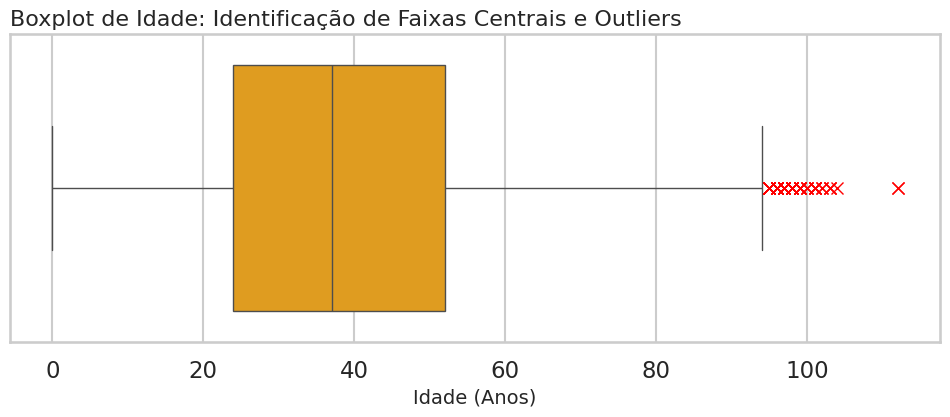


📝 CONTEXTUALIZAÇÃO DO BOXPLOT:
O gráfico acima mostra a 'caixa' onde estão concentrados 50% dos casos (intervalo interquartil).
Os pontos marcados com 'X' em vermelho são outliers: idades atípicas (muito jovens ou muito idosos) que fogem do padrão estatístico.


In [ ]:
def analise_descritiva_detalhada(dados, coluna):
    series = dados[coluna]

    # Cálculos
    media = series.mean()
    mediana = series.median()
    moda = series.mode()[0]
    desvio = series.std()
    var = series.var()
    minimo = series.min()
    maximo = series.max()
    cv = (desvio / media) * 100 # Coeficiente de Variação

    print(f"\n📊 ESTATÍSTICA DESCRITIVA: {coluna.upper()}")
    print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
    print(f"► Tendência Central:")
    print(f"  • Média:   {media:.2f} anos")
    print(f"  • Mediana: {mediana:.2f} anos (Divide o público exatamente ao meio)")
    print(f"  • Moda:    {moda:.2f} anos (Idade com maior nº de casos)")
    print(f"\n► Dispersão e Risco:")
    print(f"  • Desvio Padrão: {desvio:.2f} (Variação média em torno da idade)")
    print(f"  • Amplitude: De {minimo} a {maximo} anos")
    print(f"  • Coef. Variação: {cv:.2f}%")
    print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")

    # Visualização Boxplot
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=dados[coluna], color='orange', flierprops={"marker": "x", "markeredgecolor": "red"})
    plt.title(f'Boxplot de {coluna}: Identificação de Faixas Centrais e Outliers', loc='left', fontsize=16)
    plt.xlabel(f'{coluna} (Anos)')
    plt.show()

    print(f"\n📝 CONTEXTUALIZAÇÃO DO BOXPLOT:")
    print(f"O gráfico acima mostra a 'caixa' onde estão concentrados 50% dos casos (intervalo interquartil).")
    print(f"Os pontos marcados com 'X' em vermelho são outliers: idades atípicas (muito jovens ou muito idosos) que fogem do padrão estatístico.")

# Execução
analise_descritiva_detalhada(df, 'Idade')

# 4. Análise Exploratória: Perfil Demográfico e Sazonalidade

Quem são as vítimas? Quando os casos ocorrem?
Nesta seção, geramos gráficos explicativos para responder perguntas de negócio:
1.  **Distribuição Etária:** Histograma detalhado.
2.  **Gênero e Raça:** Cruzamento de variáveis sociais.
3.  **Sazonalidade Mensal:** Identificação de meses críticos (ex: Setembro Amarelo tem impacto? Final de ano aumenta os casos?).


1. ANÁLISE DA DISTRIBUIÇÃO ETÁRIA


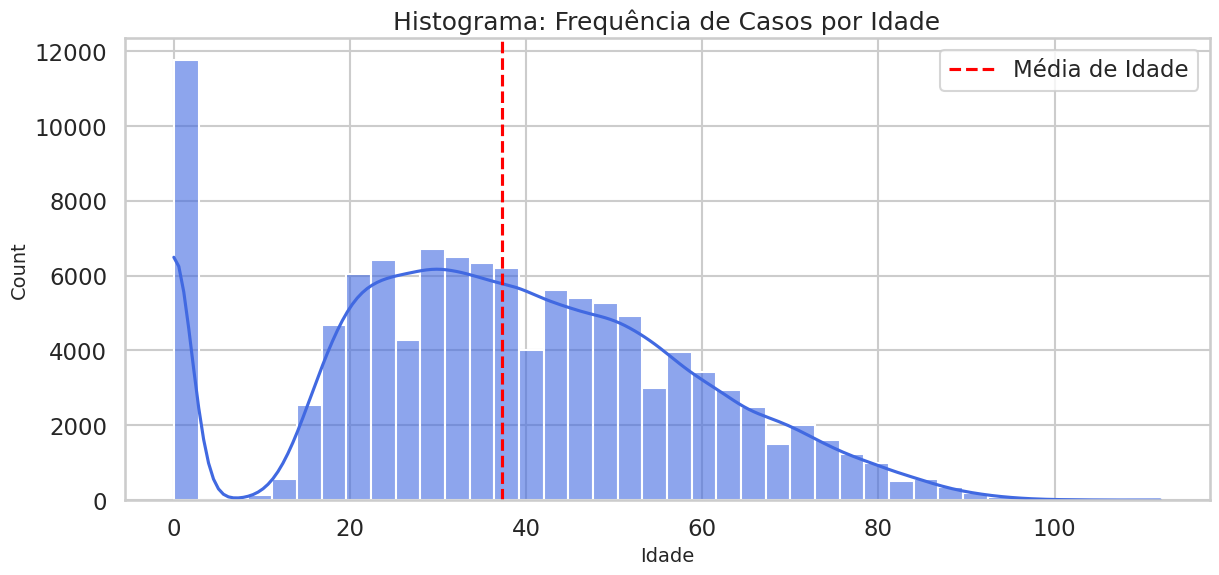

📝 INTERPRETAÇÃO:
O pico da curva (parte mais alta) indica a faixa etária de maior vulnerabilidade.
A linha vermelha indica o ponto médio. Se a cauda do gráfico se estende para a direita, indica ocorrências em idades avançadas.


2. PERFIL DEMOGRÁFICO CRUZADO (RAÇA x GÊNERO)


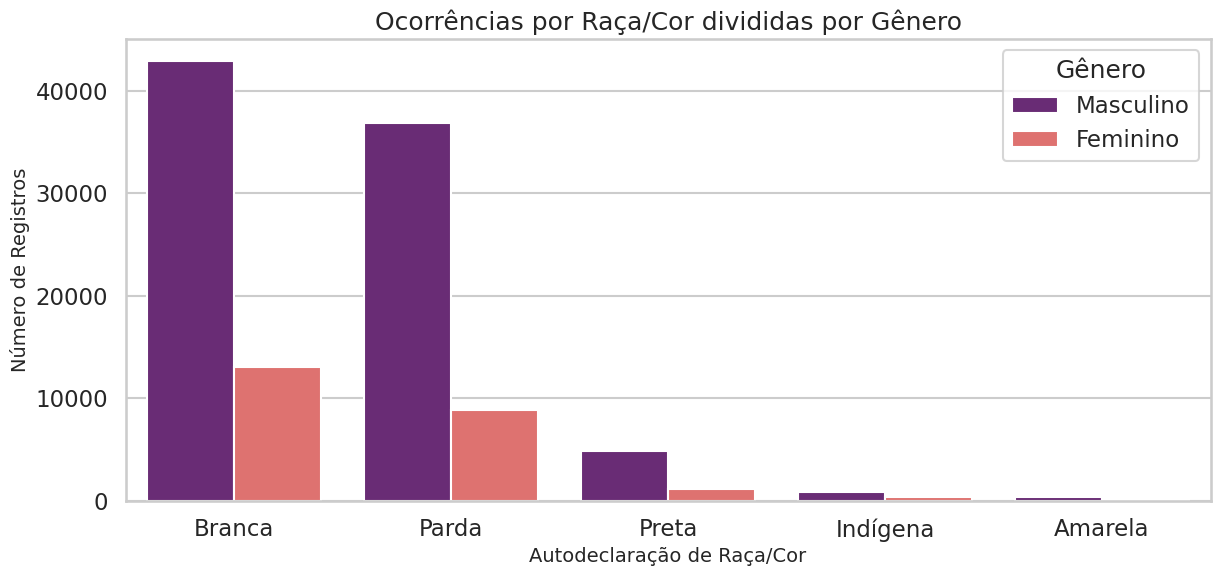

📝 INTERPRETAÇÃO:
Este gráfico permite identificar grupos de risco específicos. A disparidade entre as barras coloridas mostra se há prevalência de um gênero sobre o outro dentro de cada grupo racial.


3. ANÁLISE DE SAZONALIDADE (MÊS A MÊS)


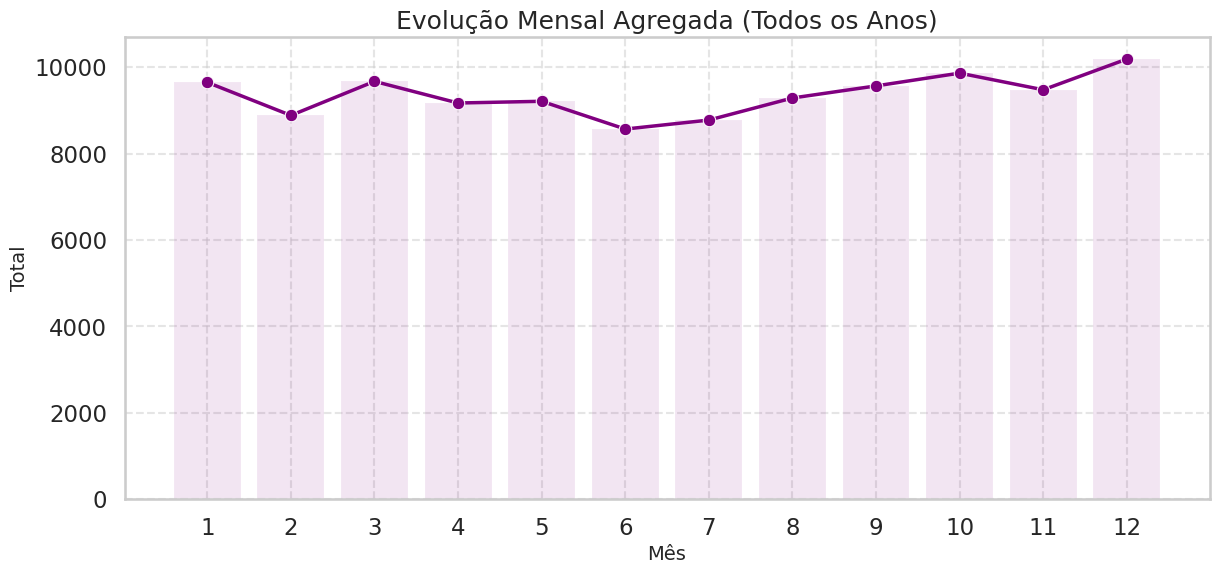

📝 INTERPRETAÇÃO:
Observamos picos e vales ao longo do ano. Picos recorrentes em meses específicos (ex: Dezembro) podem sugerir gatilhos sazonais como festas de fim de ano, exigindo campanhas preventivas focadas.


In [ ]:
# --- GRÁFICO 1: HISTOGRAMA DE IDADE ---
print(f"\n{'='*80}\n1. ANÁLISE DA DISTRIBUIÇÃO ETÁRIA\n{'='*80}")
plt.figure(figsize=(14, 6))
sns.histplot(data=df, x='Idade', bins=40, kde=True, color='royalblue', alpha=0.6)
plt.axvline(df['Idade'].mean(), color='red', linestyle='--', label='Média de Idade')
plt.title('Histograma: Frequência de Casos por Idade', fontsize=18)
plt.legend()
plt.show()

print("📝 INTERPRETAÇÃO:")
print("O pico da curva (parte mais alta) indica a faixa etária de maior vulnerabilidade.")
print("A linha vermelha indica o ponto médio. Se a cauda do gráfico se estende para a direita, indica ocorrências em idades avançadas.")

# --- GRÁFICO 2: GÊNERO E RAÇA ---
print(f"\n\n{'='*80}\n2. PERFIL DEMOGRÁFICO CRUZADO (RAÇA x GÊNERO)\n{'='*80}")
plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Raça', hue='Gênero', palette='magma', order=df['Raça'].value_counts().index)
plt.title('Ocorrências por Raça/Cor divididas por Gênero', fontsize=18)
plt.ylabel('Número de Registros')
plt.xlabel('Autodeclaração de Raça/Cor')
plt.show()

print("📝 INTERPRETAÇÃO:")
print("Este gráfico permite identificar grupos de risco específicos. A disparidade entre as barras coloridas mostra se há prevalência de um gênero sobre o outro dentro de cada grupo racial.")

# --- GRÁFICO 3: SAZONALIDADE ---
print(f"\n\n{'='*80}\n3. ANÁLISE DE SAZONALIDADE (MÊS A MÊS)\n{'='*80}")
casos_mes = df.groupby('Mês').size().reset_index(name='Total')
plt.figure(figsize=(14, 6))
sns.lineplot(data=casos_mes, x='Mês', y='Total', marker='o', color='purple', linewidth=2.5)
plt.bar(casos_mes['Mês'], casos_mes['Total'], color='purple', alpha=0.1) # Fundo sombreado
plt.title('Evolução Mensal Agregada (Todos os Anos)', fontsize=18)
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print("📝 INTERPRETAÇÃO:")
print("Observamos picos e vales ao longo do ano. Picos recorrentes em meses específicos (ex: Dezembro) podem sugerir gatilhos sazonais como festas de fim de ano, exigindo campanhas preventivas focadas.")

# 5. Correlações e Análise Multivariada

Nesta etapa, buscamos relações ocultas. Como a maioria dos nossos dados são categóricos (Texto), utilizamos técnicas de **Label Encoding** temporário para gerar uma **Matriz de Correlação**.

* **Mapa de Calor (Heatmap):** Cores quentes indicam forte relação positiva (quando um sobe, o outro sobe). Cores frias indicam relação inversa.
* **O que buscamos:** Existem correlações entre Estado Civil e Idade? Entre Local da Ocorrência e Gênero?


MAPA DE CALOR DE CORRELAÇÕES (HEATMAP)


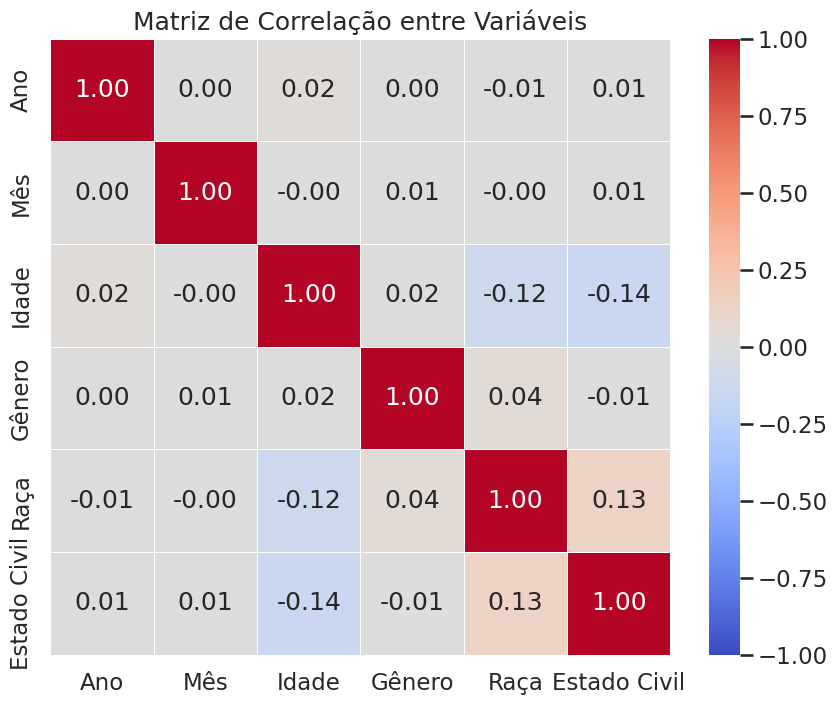

📝 INTERPRETAÇÃO E CONTEXTO:
• Valores próximos de 1.0 (Vermelho): Forte correlação positiva.
• Valores próximos de -1.0 (Azul): Forte correlação negativa.
• Valores próximos de 0.0 (Branco): Não há relação linear aparente.
NOTA: Correlação não implica causalidade, mas aponta onde devemos investigar mais a fundo.


In [ ]:
from sklearn.preprocessing import LabelEncoder

print(f"\n{'='*80}\nMAPA DE CALOR DE CORRELAÇÕES (HEATMAP)\n{'='*80}")

# Preparando dados para correlação (Cópia para não estragar o original)
df_corr = df.copy()
le = LabelEncoder()

# Convertendo textos em números apenas para análise matemática
colunas_categoricas = ['Gênero', 'Raça', 'Estado Civil', 'Local_Ocorrencia', 'UF']
for col in colunas_categoricas:
    # Força conversão para string para evitar erro em dados mistos
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Selecionando colunas para correlacionar
cols_analise = ['Ano', 'Mês', 'Idade', 'Gênero', 'Raça', 'Estado Civil']
matriz_corr = df_corr[cols_analise].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlação entre Variáveis', fontsize=18)
plt.show()

print("📝 INTERPRETAÇÃO E CONTEXTO:")
print("• Valores próximos de 1.0 (Vermelho): Forte correlação positiva.")
print("• Valores próximos de -1.0 (Azul): Forte correlação negativa.")
print("• Valores próximos de 0.0 (Branco): Não há relação linear aparente.")
print("NOTA: Correlação não implica causalidade, mas aponta onde devemos investigar mais a fundo.")

# 6. Modelagem Preditiva (Machine Learning)

Utilizamos **Regressão Linear** para projetar cenários futuros.
* **Metodologia:** Transformamos os dados individuais em uma Série Temporal (Ano x Quantidade).
* **Métricas de Avaliação:**
    * **R² (R-Quadrado):** O quanto nosso modelo consegue explicar da realidade (quanto mais perto de 1.0, melhor).
    * **RMSE (Erro Quadrático Médio):** A margem de erro média do modelo em número de casos.


MODELAGEM PREDITIVA: TENDÊNCIA TEMPORAL


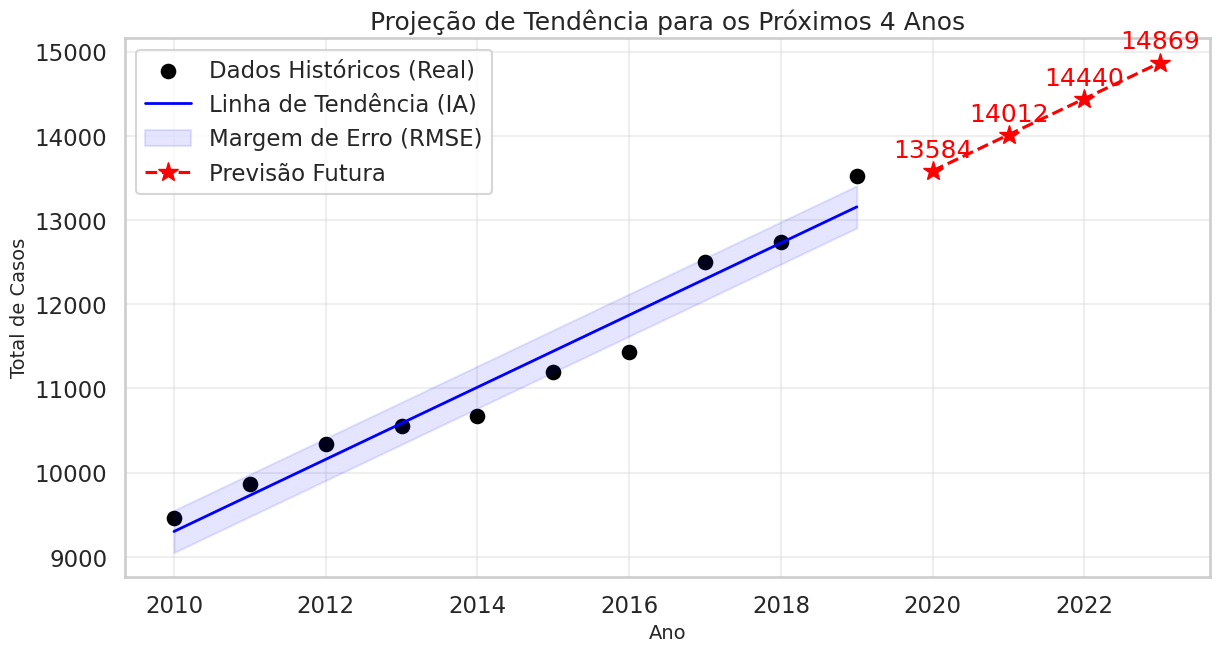


🧠 RELATÓRIO DE INTELIGÊNCIA PREDITIVA:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. Qualidade do Modelo (R²): 0.9601
   (O modelo explica 96.01% da variação dos dados históricos)
2. Margem de Erro Média (RMSE): +/- 250.61 casos
3. Status da Tendência: CRESCENTE 📈
   (Taxa de variação: 428 novos casos por ano)

🔮 PREVISÃO DETALHADA:
   • 2020: Estimativa de 13584 casos
   • 2021: Estimativa de 14012 casos
   • 2022: Estimativa de 14440 casos
   • 2023: Estimativa de 14869 casos


In [ ]:
def predicao_avancada(dataframe, anos_futuro=5):
    print(f"\n{'='*80}\nMODELAGEM PREDITIVA: TENDÊNCIA TEMPORAL\n{'='*80}")

    # 1. Agrupamento (Criando a Série Temporal)
    dados_anuais = dataframe.groupby('Ano').size().reset_index(name='Total_Casos')

    X = dados_anuais['Ano'].values.reshape(-1, 1)
    y = dados_anuais['Total_Casos'].values

    # 2. Treinamento
    modelo = LinearRegression()
    modelo.fit(X, y)

    # 3. Previsões (Passado e Futuro)
    predicao_treino = modelo.predict(X) # O que o modelo 'acha' do passado

    ultimo_ano = dados_anuais['Ano'].max()
    anos_x_futuro = np.array([[ultimo_ano + i] for i in range(1, anos_futuro + 1)])
    predicao_futuro = modelo.predict(anos_x_futuro)

    # 4. Métricas de Qualidade
    r2 = r2_score(y, predicao_treino)
    rmse = np.sqrt(mean_squared_error(y, predicao_treino))
    tendencia = modelo.coef_[0] # Inclinação da reta

    # 5. Visualização Complexa
    plt.figure(figsize=(14, 7))

    # Dados Reais
    sns.scatterplot(x=dados_anuais['Ano'], y=dados_anuais['Total_Casos'], s=150, color='black', label='Dados Históricos (Real)')

    # Linha de Regressão (Modelo)
    plt.plot(dados_anuais['Ano'], predicao_treino, color='blue', linewidth=2, label=f'Linha de Tendência (IA)')

    # Intervalo de Confiança (Visual - Área sombreada simples simulada)
    plt.fill_between(dados_anuais['Ano'], predicao_treino - rmse, predicao_treino + rmse, color='blue', alpha=0.1, label='Margem de Erro (RMSE)')

    # Futuro
    plt.plot(anos_x_futuro, predicao_futuro, color='red', marker='*', markersize=15, linestyle='--', label='Previsão Futura')

    # Anotações no Gráfico
    for i, txt in enumerate(predicao_futuro):
        plt.annotate(f"{int(txt)}", (anos_x_futuro[i], predicao_futuro[i]), textcoords="offset points", xytext=(0,10), ha='center', color='red')

    plt.title(f'Projeção de Tendência para os Próximos {anos_futuro} Anos', fontsize=18)
    plt.xlabel('Ano')
    plt.ylabel('Total de Casos')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # 6. Relatório Final da IA
    print(f"\n🧠 RELATÓRIO DE INTELIGÊNCIA PREDITIVA:")
    print(f"━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━")
    print(f"1. Qualidade do Modelo (R²): {r2:.4f}")
    print(f"   (O modelo explica {r2*100:.2f}% da variação dos dados históricos)")

    print(f"2. Margem de Erro Média (RMSE): +/- {rmse:.2f} casos")

    status = "CRESCENTE 📈" if tendencia > 0 else "DECRESCENTE 📉"
    print(f"3. Status da Tendência: {status}")
    print(f"   (Taxa de variação: {int(tendencia)} novos casos por ano)")

    print(f"\n🔮 PREVISÃO DETALHADA:")
    for i, ano in enumerate(anos_x_futuro):
        print(f"   • {ano[0]}: Estimativa de {int(predicao_futuro[i])} casos")

# Executar
predicao_avancada(df, anos_futuro=4)